<a href="https://colab.research.google.com/github/changhorang/SSAC_study/blob/main/DL/04_tfdata_%ED%8C%8C%EC%9D%B4%ED%94%84%EB%9D%BC%EC%9D%B8_%EB%B6%84%EB%A5%98_%ED%9A%8C%EA%B7%80_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tf.data 모듈
- 데이터 입력 파이프라인을 위한 모듈
    - 모델 학습/평가를 위한 대용량 데이터셋을 제공(feeding)하기 위한 모듈
    - raw dataset 에서 입력을 위한 전처리, 제공을 위한 배치, shuffling등을 한번에 처리할 수 있게 한다.
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스들을 제공
    - 입력 소스의 제공 형태에 따라 다양한 방식을 제공

## Dataset API 사용
1. **Dataset 생성**
    - raw dataset을 지정
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스등를 사용해 메모리나 파일에 있는 데이터를 Dataset으로 만든다.
    - **from_tensor_slices()**: 리스트 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.

2. **제공 데이터 전처리**
    - **map(함수)**: 하나 하나의 데이터를 변환
        - 함수: 값을 변환할 함수로 입력데이터셋의 개수만큼 매개변수 선언
    - **filter(함수)**: 특정 조건의 데이터만 제공하도록 처리.
        - 함수: 제공할 값의 조건을 정의한 함수로 입력데이터셋의 개수만큼 매개변수 선언하고 bool 값을 반환.

3. **Dataset을 사용해 데이터 제공**
    - **batch(size)**: 학습/평가시 한번에 제공할 batch size 지정
        - size: int. batch size 지정
        - drop_remainder: bool. True일 경우 마지막 제공시 남은 데이터수가 batch size보다 작으면 제공하지 않는다.
    - **shuffle(buffer 크기)**: dataset의 원소들의 순서를 섞는다. 
        - buffer 크기: int. buffer 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다.
        - 데이터 사이즈가 너무 커서 메모리가 부족할 경우 버퍼크기를 적게 준다.
        - 메모리가 충분하다면 데이터의 개수와 동일하게 주면된다.
        - epoch 단위로 shuffle 한다.
    - **repeat(count)**: 전체 데이터를 한번 다 제공한 뒤 다시 데이터를 제공한다.
        - count: 몇번 제공할지 반복 횟수
        - shuffle이 적용된 Dataset의 경우 다음 반복 제공마다 shuffle을 진행한다.
        

- 각 tf.data 함수들은 각 기능에 맞게 데이터를 처리하는 Dataset 객체를 반환한다.

### Dataset 메소드
- take(개수): 지정한 개수만큼의 데이터만 제공한다.

In [1]:
import tensorflow as tf
import numpy as np

##### Tensor
- TensorFlow의 기본 data type. 
- numpy가 ndarray를 이용해 데이터를 관리하듯이 tensorflow를 Tensor를 이용해 데이터를 관리한다.

In [2]:
t = tf.constant([1,2,3], dtype="float32")
t

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [3]:
# tensor=>numpy 변환
a = t.numpy()
a

array([1., 2., 3.], dtype=float32)

In [4]:
# numpy/list => tensor 변환
t2 = tf.constant(a)
t2

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [5]:
# numpy/list => tensor 변환
t3 = tf.convert_to_tensor(a)
t3

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

## Dataset 예제

In [6]:
raw_data1 = np.arange(10)
raw_data1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
# ndarray/list 같이 메모리에 있는 자료구조로 부터 dataset 생성
# - from_tensor_slices()
dataset = tf.data.Dataset.from_tensor_slices(raw_data1)
print(type(dataset))

<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>


In [8]:
# Dataset : iterator => for문을 이용해 값을 조회할 수 있음
for data in dataset:
    print(data)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


##### x, y 묶어서 제공

In [9]:
raw_data2 = np.arange(10, 20)
raw_data2

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [10]:
print(raw_data1)
print(raw_data2)

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]


In [11]:
# 2개 이상의 Dataset을 묶어서 제공할 경우, tuple로 묶어준다
# Dataset이 데이터를 제공할 때 같은 index의 데이터들을 묶어서 제공 (== zip())
dataset2 = tf.data.Dataset.from_tensor_slices((raw_data1, raw_data2)) 
for X, y in dataset2:
    print(X, y, sep=' --- ')

tf.Tensor(0, shape=(), dtype=int64) --- tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64) --- tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64) --- tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64) --- tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64) --- tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64) --- tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64) --- tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64) --- tf.Tensor(17, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64) --- tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64) --- tf.Tensor(19, shape=(), dtype=int64)


In [12]:
# take(n) : Dataset에서 지정한 개수만큼의 데이터를 조회
dataset3 = dataset.take(3)
print(type(dataset3))
for data in dataset3:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.TakeDataset'>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)


In [13]:
d = dataset2.take(2)
for X, y in d:
  print(X, y, sep=', ')

tf.Tensor(0, shape=(), dtype=int64), tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64), tf.Tensor(11, shape=(), dtype=int64)


##### shuffle

In [14]:
# shuffle(buffer_size) : data를 제공하기 전에 섞는다
dataset4 = dataset.shuffle(10) 
print(type(dataset4))
for data in dataset4:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.ShuffleDataset'>
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)


##### batch
- drop_remainder: boolean(기본-False)
    - batch로 제공할 데이터의 개수가 설정한 batch_size 보다 적으면 제공하지 않는다.

In [15]:
# batch(size) : 한 번에 size만큼 데이터를 제공
dataset5 = dataset.batch(3, drop_remainder = True)
print(type(dataset5))
for data in dataset5:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
tf.Tensor([0 1 2], shape=(3,), dtype=int64)
tf.Tensor([3 4 5], shape=(3,), dtype=int64)
tf.Tensor([6 7 8], shape=(3,), dtype=int64)


In [16]:
dataset6 = dataset.shuffle(10).batch(3)
for d in dataset6:
    print(d)

tf.Tensor([9 1 7], shape=(3,), dtype=int64)
tf.Tensor([5 0 8], shape=(3,), dtype=int64)
tf.Tensor([6 3 4], shape=(3,), dtype=int64)
tf.Tensor([2], shape=(1,), dtype=int64)


##### repeat

In [17]:
# repeat(n): 데이터를 반복횟수만큼 반복해서 제공. 반복횟수 생략하면 무한제공,
dataset7 = dataset.repeat(3) 
print(type(dataset7))
for data in dataset7:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.RepeatDataset'>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
t

In [18]:
dataset8 = dataset.shuffle(10).batch(5).repeat(3)
for data in dataset8:
    print(data)

tf.Tensor([8 9 0 2 3], shape=(5,), dtype=int64)
tf.Tensor([4 7 1 6 5], shape=(5,), dtype=int64)
tf.Tensor([5 6 8 3 0], shape=(5,), dtype=int64)
tf.Tensor([1 7 4 9 2], shape=(5,), dtype=int64)
tf.Tensor([9 1 7 0 3], shape=(5,), dtype=int64)
tf.Tensor([6 5 2 8 4], shape=(5,), dtype=int64)


In [19]:
d = dataset2.shuffle(10).batch(5).repeat(3)
for X, y in d:
    print(X, y, sep=', ')

tf.Tensor([1 6 7 0 8], shape=(5,), dtype=int64), tf.Tensor([11 16 17 10 18], shape=(5,), dtype=int64)
tf.Tensor([3 4 9 5 2], shape=(5,), dtype=int64), tf.Tensor([13 14 19 15 12], shape=(5,), dtype=int64)
tf.Tensor([7 8 0 6 5], shape=(5,), dtype=int64), tf.Tensor([17 18 10 16 15], shape=(5,), dtype=int64)
tf.Tensor([9 4 3 2 1], shape=(5,), dtype=int64), tf.Tensor([19 14 13 12 11], shape=(5,), dtype=int64)
tf.Tensor([4 3 1 2 5], shape=(5,), dtype=int64), tf.Tensor([14 13 11 12 15], shape=(5,), dtype=int64)
tf.Tensor([0 7 9 8 6], shape=(5,), dtype=int64), tf.Tensor([10 17 19 18 16], shape=(5,), dtype=int64)


##### map

In [20]:
# 매개변수 : 원소 받을 변수
# 리턴 : 변환된 값
def mapping_func(x):
    return x**2

dataset9 = dataset.map(mapping_func) # map에 함수 객체를 넣을것!
print(type(dataset9))
for data in dataset9:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(25, shape=(), dtype=int64)
tf.Tensor(36, shape=(), dtype=int64)
tf.Tensor(49, shape=(), dtype=int64)
tf.Tensor(64, shape=(), dtype=int64)
tf.Tensor(81, shape=(), dtype=int64)


In [21]:
def mapping_func2(x, y):
    return x**3, y

dataset2 = tf.data.Dataset.from_tensor_slices((raw_data1, raw_data2))
dataset10 = dataset2.map(mapping_func2)

for X, y in dataset10:
  print(X, y, sep=', ')

tf.Tensor(0, shape=(), dtype=int64), tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64), tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64), tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(27, shape=(), dtype=int64), tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(64, shape=(), dtype=int64), tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(125, shape=(), dtype=int64), tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(216, shape=(), dtype=int64), tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(343, shape=(), dtype=int64), tf.Tensor(17, shape=(), dtype=int64)
tf.Tensor(512, shape=(), dtype=int64), tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(729, shape=(), dtype=int64), tf.Tensor(19, shape=(), dtype=int64)


In [22]:
dataset11 = dataset.map(lambda x: x**2)
for data in dataset11:
    print(data)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(25, shape=(), dtype=int64)
tf.Tensor(36, shape=(), dtype=int64)
tf.Tensor(49, shape=(), dtype=int64)
tf.Tensor(64, shape=(), dtype=int64)
tf.Tensor(81, shape=(), dtype=int64)


In [23]:
dataset12 = dataset2.map(lambda x, y: (x**3, y**2))
for data in dataset12:
    print(data)

(<tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=100>)
(<tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=121>)
(<tf.Tensor: shape=(), dtype=int64, numpy=8>, <tf.Tensor: shape=(), dtype=int64, numpy=144>)
(<tf.Tensor: shape=(), dtype=int64, numpy=27>, <tf.Tensor: shape=(), dtype=int64, numpy=169>)
(<tf.Tensor: shape=(), dtype=int64, numpy=64>, <tf.Tensor: shape=(), dtype=int64, numpy=196>)
(<tf.Tensor: shape=(), dtype=int64, numpy=125>, <tf.Tensor: shape=(), dtype=int64, numpy=225>)
(<tf.Tensor: shape=(), dtype=int64, numpy=216>, <tf.Tensor: shape=(), dtype=int64, numpy=256>)
(<tf.Tensor: shape=(), dtype=int64, numpy=343>, <tf.Tensor: shape=(), dtype=int64, numpy=289>)
(<tf.Tensor: shape=(), dtype=int64, numpy=512>, <tf.Tensor: shape=(), dtype=int64, numpy=324>)
(<tf.Tensor: shape=(), dtype=int64, numpy=729>, <tf.Tensor: shape=(), dtype=int64, numpy=361>)


##### filter

In [24]:
# filter: 특정 조건을 만족하는 원소만 제공
# 매개변수: 원소 받을 변수
# 리턴: bool => True인 원소만 제공
def filter_func(x):
    return x%2 == 0 

dataset13 = dataset.filter(filter_func)
print(type(dataset13))

for data in dataset13:
  print(data)

<class 'tensorflow.python.data.ops.dataset_ops.FilterDataset'>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)


In [25]:
dataset14 = dataset.filter(lambda x : x > 5)
for data in dataset14:
    print(data)

tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


##### 종합

In [32]:
raw_data = np.arange(-10,11)
# x, y 다른 변수명으로 해도 상관은 없음 (경고문 없어짐)
dataset_final = tf.data.Dataset.from_tensor_slices(raw_data)\
                               .filter(lambda x:x>=0)\
                               .map(lambda x:x+10)\
                               .shuffle(raw_data.size)\
                               .batch(3)#, drop_remainder=True)

Cause: could not parse the source code of <function <lambda> at 0x7f465ba37cb0>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
(lambda x: (x + 10))

Match 1:
(lambda x: (x >= 0))

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7f465ba37cb0>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
(lambda x: (x + 10))

Match 1:
(lambda x: (x >= 0))

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7f465ba377a0>: found multiple definitions with identical sig

In [33]:
for data in dataset_final:
    print(data)

tf.Tensor([15 19 20], shape=(3,), dtype=int64)
tf.Tensor([13 12 10], shape=(3,), dtype=int64)
tf.Tensor([11 16 17], shape=(3,), dtype=int64)
tf.Tensor([14 18], shape=(2,), dtype=int64)


# 문제 유형별 MLP 네트워크
- Multi Layer Perceptron
    - Fully Connected Layer로 구성된 네트워크

# Regression(회귀)

## Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율
<br><br>
- **Target**
    - MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [34]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers, models

In [35]:
# 랜덤값이 완전 보장되지는 않음
np.random.seed(0)
tf.random.set_seed(0)

##### 데이터 로딩

In [36]:
(train_X, train_y), (test_X, test_y) = keras.datasets.boston_housing.load_data()
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)

65536/57026 [==================================] - 0s 0us/step
(404, 13) (102, 13)
(404,) (102,)


In [37]:
train_X[:5]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00],
       [3.96100e-02, 0.00000e+00, 5.19000e+00, 0.00000e+00, 5.15000e-01,
        6.03700e+00, 3.45000e+01, 5.98530e+00, 5.00000e+00, 2.24000e+02,
        2.02000e+01, 3.96900e+02, 8.01000e+00],
       [3.69311e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        6.37600e+00, 8.84000e+01, 2.56710e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.91430e+02, 1.46500e+01]])

In [ ]:

train_y[:5]

##### 하이퍼파라미터, 변수 정의

In [38]:
# hyperparameter
LEARNING_RATE = 0.001 # optimizer에 설정할 학습률
N_EPOCHS  = 200 # 데이터셋을 몇 번 학습 시킬지
N_BATCHS = 32   # 배치사이즈 - 최적화 데이터 단위

# train/test 개수
N_TRAIN = train_X.shape[0]
N_TEST = test_X.shape[0]   

##### X, y 전처리
- MLP는 선형기반 모델이므로 Feature scaling을 해준다.

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(train_X)
X_test = scaler.transform(test_X)

##### Dataset 생성

In [40]:
# train dataset - 일반적으로 batch에서 drop_remainder=True 로 설정 (학습의 일관성을 위해서)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, train_y))\
                                .shuffle(N_TRAIN)\
                                .batch(N_BATCHS, drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, test_y)).batch(N_BATCHS)

##### 모델 구현

In [41]:
# model 생성 함수
def create_housing_model():
    
    # 모델 객체 생성
    model = keras.Sequential()

    # 모델 객체 Layer 추가
    # Hidden Layer => Feature Extractor
    # model.add(layers.InputLayer((13, ))) 
    
    # => input layer는 입력데이터의 shape만 정의하면 되므로
    # 첫번째 layer의 input_shape 매개변수에 shape을 지정하는 것으로 대체 가능

    model.add(layers.Dense(units=128, activation='relu', input_shape=(13,)))
    model.add(layers.Dense(units=64, activation='relu'))
    model.add(layers.Dense(units=32, activation='relu'))
    model.add(layers.Dense(units=16, activation='relu'))
    
    # Output Layer - Regression : unit 개수 = 1 (집값 예측) / activation 함수 : None
    model.add(layers.Dense(units=1, name='output')) # name : layer의 이름 설정
    
    return model

In [42]:
model = create_housing_model()
# 회귀에서 loss func.: mse (Mean Squared Error)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),  # default가 아닌 경우 객체 생성 필수
              loss='mse')

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


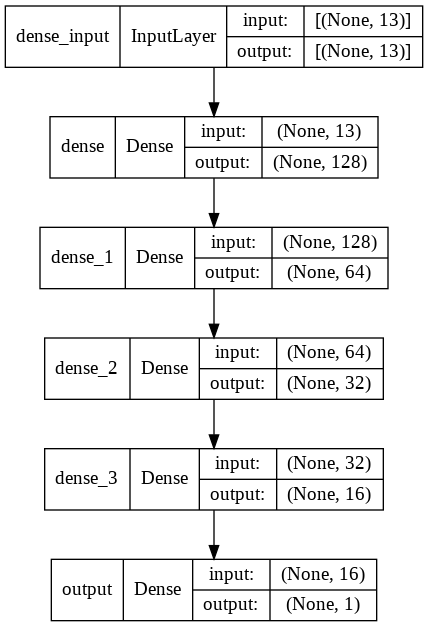

In [44]:
keras.utils.plot_model(model, show_shapes=True)

##### 학습(Train)

In [45]:
# tf.data.Dataset으로 train 데이터 주입시 validation_split 사용할 수 없음 (비율로 나누기)
# 검증 데이터셋도 Dataset으로 만든 뒤 validataion_data 매개변수에 전달
# 결과는 과적합 (loss, val_loss 차이로 확인) : data양이 작기 때문에
hist = model.fit(train_dataset,
                 epochs=N_EPOCHS,
                 validation_data=test_dataset)

Epoch 1/200
12/12 [==============================] - 2s 12ms/step - loss: 577.3931 - val_loss: 588.7253
Epoch 2/200
12/12 [==============================] - 0s 3ms/step - loss: 535.2087 - val_loss: 528.5536
Epoch 3/200
12/12 [==============================] - 0s 4ms/step - loss: 449.3872 - val_loss: 395.9595
Epoch 4/200
12/12 [==============================] - 0s 3ms/step - loss: 285.8768 - val_loss: 178.5862
Epoch 5/200
12/12 [==============================] - 0s 4ms/step - loss: 109.0839 - val_loss: 73.3983
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 65.2825 - val_loss: 45.6336
Epoch 7/200
12/12 [==============================] - 0s 3ms/step - loss: 39.5779 - val_loss: 34.2212
Epoch 8/200
12/12 [==============================] - 0s 3ms/step - loss: 28.1576 - val_loss: 27.1693
Epoch 9/200
12/12 [==============================] - 0s 3ms/step - loss: 23.3588 - val_loss: 25.1919
Epoch 10/200
12/12 [==============================] - 0s 3ms/step - loss: 19.0858

##### 결과 시각화

In [46]:
import matplotlib.pyplot as plt

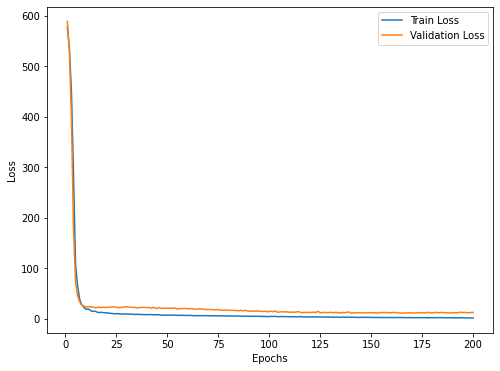

In [47]:
plt.figure(figsize=(8,6))
plt.plot(range(1,N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1,N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

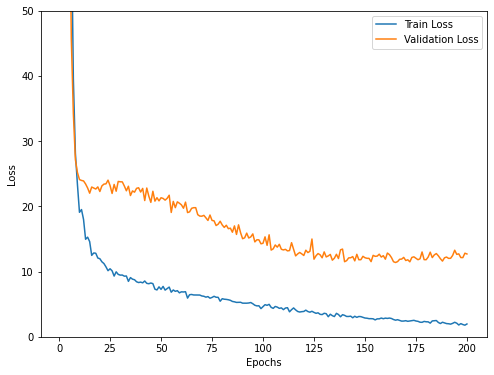

In [48]:
plt.figure(figsize=(8,6))
plt.plot(range(1,N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1,N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')

plt.ylim(0,50)

plt.legend()
plt.show()

##### 최종 테스트

In [49]:
loss = model.evaluate(test_dataset)
print(loss)

4/4 [==============================] - 0s 3ms/step - loss: 12.6955
12.695542335510254


##### 모델 네트워크 저장

In [50]:
model.save('models/boston_hosing_model')

INFO:tensorflow:Assets written to: models/boston_hosing_model/assets


##### 새로운 데이터 추론

In [51]:
new_data = X_test[:5]
pred = model.predict(new_data)

In [52]:
pred

array([[ 8.415545],
       [18.235497],
       [20.624174],
       [31.990938],
       [24.556444]], dtype=float32)

In [53]:
test_y[:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])

# 분류 (Classification)

## Fashion MNIST Dataset - 다중분류(Multi-Class Classification) 문제

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

이미지는 28x28 크기이며 Gray scale이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)들이다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [54]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

In [55]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##### Data 로딩

In [56]:
(train_image, train_label), (test_image, test_label) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [57]:
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

##### validata set  생성

In [58]:
from sklearn.model_selection import train_test_split
train_image, val_image, train_label, val_label = train_test_split(train_image, train_label, test_size=0.2, stratify=train_label, random_state=0)

In [59]:
train_image.shape, val_image.shape, test_image.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

##### 이미지 확인

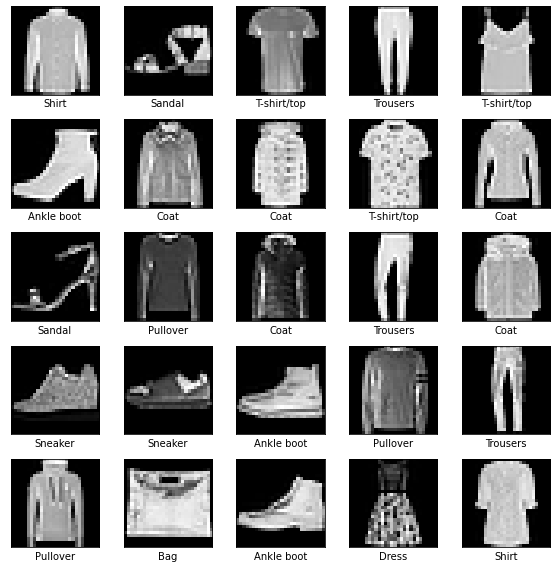

In [63]:
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_image[i], cmap='gray')#"Greys")
    plt.xlabel(class_names[train_label[i]])

plt.tight_layout()
plt.show()

#### 하이퍼파라미터, 변수 설정

In [64]:
LEARNING_RATE = 0.001
N_EPOCHS = 100
N_BATCHS = 100

# train / validation / test set의 데이터 개수
N_TRAIN = train_image.shape[0]
N_VAL = val_image.shape[0]
N_TEST = test_image.shape[0]

#### X, y  전처리
- y값 처리
    - 다중 분류에서 label encoding 형식의 label을 one hot encoding 처리

In [67]:
# label encoding된 형태 (onehot encoding 처리 필요)
train_label, train_label.shape

(array([6, 5, 0, ..., 7, 4, 9], dtype=uint8), (48000,))

In [66]:
y_train = keras.utils.to_categorical(train_label)
y_val = keras.utils.to_categorical(val_label)
y_test = keras.utils.to_categorical(test_label)
print(y_train.shape, y_val.shape, y_test.shape)

(48000, 10) (12000, 10) (10000, 10)


In [68]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

- x값(이미지) 처리
    - 이미지데이터 전처리: 0 ~ 1 정규화. X/255.0 => Dataset 생성에서 처리

In [69]:
# map을 적용해보기 위해 밑에와 같이 구현
X_train = train_image.astype(np.float32)#/255.
X_val = val_image.astype(np.float32)#/255.
X_test = test_image.astype(np.float32)#/255.

##### Dataset 생성

In [70]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .map(lambda x, y : (x/255, y))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).map(lambda x, y:(x/255, y)).batch(N_BATCHS)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).map(lambda x, y:(x/255, y)).batch(N_BATCHS)

In [71]:
X_train.shape

(48000, 28, 28)

##### 모델 생성 및 컴파일

In [72]:
def create_fashionmnist_model():
    # 모델 생성
    model = keras.Sequential()

    # hidden layer 
    # (Dense layer는 input으로 1차원 배열을 받음. 입력 data가 1차원이 아닐 경우, 1차원 변환이 필요)
    # Flatten 이용
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=64, activation='relu'))
    
    # output layer (다중 클래스 분류 : unit 수 = class 수, activation func. = softmax (class별 확률))
    model.add(layers.Dense(units=10, activation='softmax'))
    
    return model

In [73]:
model = create_fashionmnist_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy', # 다중분류 loss 함수
              metrics=['accuracy'])            # loss 이외의 추가 평가지표 설정

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


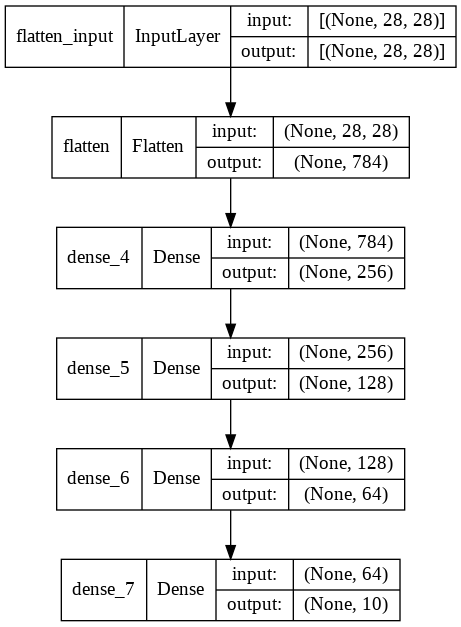

In [75]:
keras.utils.plot_model(model, show_shapes=True, to_file='fashion_mnist_model.png')

##### Train(학습)

In [76]:
hist = model.fit(train_dataset,
                 epochs=N_EPOCHS,
                 validation_data=val_dataset)

Epoch 1/100
480/480 [==============================] - 3s 4ms/step - loss: 0.5456 - accuracy: 0.8095 - val_loss: 0.4161 - val_accuracy: 0.8495
Epoch 2/100
480/480 [==============================] - 3s 4ms/step - loss: 0.3814 - accuracy: 0.8627 - val_loss: 0.3877 - val_accuracy: 0.8553
Epoch 3/100
480/480 [==============================] - 3s 5ms/step - loss: 0.3398 - accuracy: 0.8759 - val_loss: 0.3463 - val_accuracy: 0.8720
Epoch 4/100
480/480 [==============================] - 3s 5ms/step - loss: 0.3124 - accuracy: 0.8846 - val_loss: 0.3230 - val_accuracy: 0.8827
Epoch 5/100
480/480 [==============================] - 3s 4ms/step - loss: 0.2942 - accuracy: 0.8907 - val_loss: 0.3156 - val_accuracy: 0.8853
Epoch 6/100
480/480 [==============================] - 3s 4ms/step - loss: 0.2776 - accuracy: 0.8965 - val_loss: 0.3209 - val_accuracy: 0.8852
Epoch 7/100
480/480 [==============================] - 3s 4ms/step - loss: 0.2633 - accuracy: 0.9020 - val_loss: 0.3165 - val_accuracy: 0.8823

모델을 재학습 시킬 경우 (가장 성능이 좋았던 epoch수에 맞춰) 모델 생성->컴파일->학습 을 다시 진행해야함. 단순히 학습(fit)만 다시 실행하면 이어서 학습하는 것이 되므로 주의해야함.

##### 결과 시각화

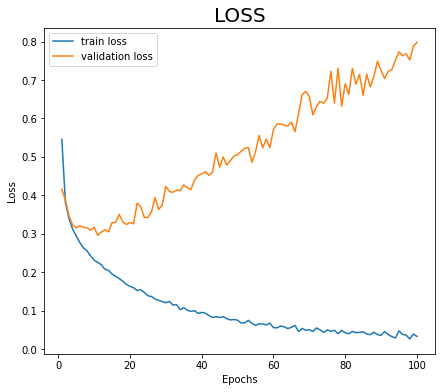

In [77]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='train loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='validation loss')
plt.title("LOSS", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

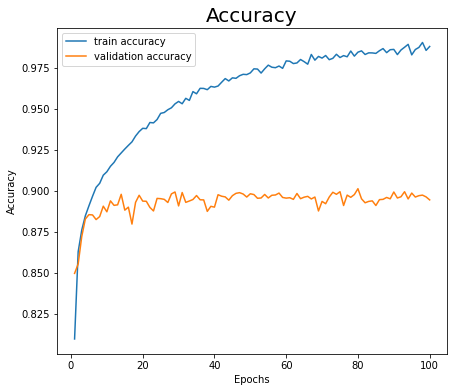

In [78]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['accuracy'], label='train accuracy')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_accuracy'], label='validation accuracy')
plt.title("Accuracy", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 최종평가

In [79]:
loss, accuracy = model.evaluate(test_dataset)

100/100 [==============================] - 0s 4ms/step - loss: 0.8704 - accuracy: 0.8892


In [80]:
print(loss, accuracy)

0.8703945279121399 0.88919997215271


#### 새로운 데이터 추론

In [81]:
new_input = X_test[:5]
new_input = new_input/255.0

In [82]:
pred = model.predict(new_input)
pred[0]

array([7.99838695e-10, 1.22751905e-14, 2.18355404e-13, 3.84378147e-08,
       1.02218208e-13, 1.43904072e-06, 2.51833138e-10, 2.01184457e-06,
       8.32509991e-14, 9.99996543e-01], dtype=float32)

In [83]:
pred_class = np.argmax(pred, axis=-1)
pred_class

array([9, 2, 1, 1, 6])

In [84]:
test_label[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [86]:
class_names = np.array(class_names)
  class_names[pred_class]

array(['Ankle boot', 'Pullover', 'Trousers', 'Trousers', 'Shirt'],
      dtype='<U11')

## 위스콘신 유방암 데이터셋 - 이진분류(Binary Classification) 문제
- 위스콘신 대학교에서 제공한 종양의 악성/양성여부 분류를 위한 데이터셋
- Feature
    - 종양에 대한 다양한 측정값들
- Target의 class
    - 0 - malignant(악성종양)
    - 1 - benign(양성종양)

In [87]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(0)
tf.random.set_seed(0)

##### 데이터 로딩, train/validation/test set 나누기

In [88]:
X, y = load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

X_train.shape, X_val.shape, X_test.shape

((364, 30), (91, 30), (114, 30))

In [90]:
X_train[:3]

array([[1.955e+01, 2.321e+01, 1.289e+02, 1.174e+03, 1.010e-01, 1.318e-01,
        1.856e-01, 1.021e-01, 1.989e-01, 5.884e-02, 6.107e-01, 2.836e+00,
        5.383e+00, 7.010e+01, 1.124e-02, 4.097e-02, 7.469e-02, 3.441e-02,
        2.768e-02, 6.240e-03, 2.082e+01, 3.044e+01, 1.420e+02, 1.313e+03,
        1.251e-01, 2.414e-01, 3.829e-01, 1.825e-01, 2.576e-01, 7.602e-02],
       [1.378e+01, 1.579e+01, 8.837e+01, 5.859e+02, 8.817e-02, 6.718e-02,
        1.055e-02, 9.937e-03, 1.405e-01, 5.848e-02, 3.563e-01, 4.833e-01,
        2.235e+00, 2.934e+01, 6.432e-03, 1.156e-02, 7.741e-03, 5.657e-03,
        1.227e-02, 2.564e-03, 1.527e+01, 1.750e+01, 9.790e+01, 7.066e+02,
        1.072e-01, 1.071e-01, 3.517e-02, 3.312e-02, 1.859e-01, 6.810e-02],
       [1.865e+01, 1.760e+01, 1.237e+02, 1.076e+03, 1.099e-01, 1.686e-01,
        1.974e-01, 1.009e-01, 1.907e-01, 6.049e-02, 6.289e-01, 6.633e-01,
        4.293e+00, 7.156e+01, 6.294e-03, 3.994e-02, 5.554e-02, 1.695e-02,
        2.428e-02, 3.535e-03, 2.282e

In [92]:
y_train[:3]

array([0, 1, 0])

#### 하이퍼파라미터, 변수 정의

In [93]:
LEARNING_RATE = 0.001
N_EPOCHS = 150
N_BATCHS = 50

N_TRAIN = X_train.shape[0]
N_VAL = X_val.shape[0]
N_TEST = X_test.shape[0]

#### 데이터 전처리
- 이진 분류
    - 출력 레이어의 unit을 1개, activation 함수를 sigmoid를 사용하는 경우(1일 확률) => y:그대로 사용
    - 출력 레이어의 unit을 2개, activation 함수를 sofmax를 사용하는 경우(0일 확률, 1일 확률) - 다중분류와 동일하게 구현 => y: one hot encoding
- X: 테이블데이터
    - 문자열(범주형): one hot encoding
    - 연속형(수치형): feature scaling

In [94]:
# Feature scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#### Dataset 생성

In [95]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).shuffle(N_TRAIN)\
                                                    .batch(N_BATCHS, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCHS)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCHS)

#### model 생성, 컴파일

In [96]:
def create_wisconsin_model():
    # 모델 생성
    model = keras.Sequential()

    # hidden layer
    model.add(layers.Dense(units=32, activation='relu', input_shape=(30, )))
    model.add(layers.Dense(units=16, activation='relu'))
    model.add(layers.Dense(units=8, activation='relu'))
    
    # output layer
    # 이진 분류 : 1일 확률 출력하는 방식으로 구현
    # unit = 1 / activation_func = sigmoid
    model.add(layers.Dense(units=1, activation='sigmoid', name='Output_layer'))
    
    return model

In [98]:
model = create_wisconsin_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='binary_crossentropy', # 이진 분류에서 1의 확률을 출력하는 경우 loss
              metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                992       
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 Output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________


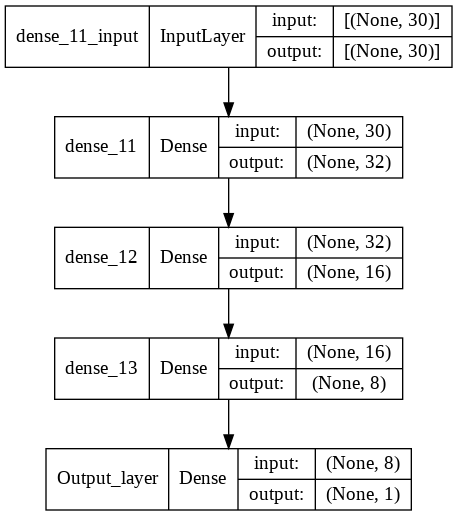

In [100]:
keras.utils.plot_model(model, show_shapes=True, to_file='cancer_model.png')

#### Train(학습)

In [101]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=val_dataset)

Epoch 1/150
7/7 [==============================] - 1s 20ms/step - loss: 0.7270 - accuracy: 0.3943 - val_loss: 0.6933 - val_accuracy: 0.4835
Epoch 2/150
7/7 [==============================] - 0s 4ms/step - loss: 0.6502 - accuracy: 0.5657 - val_loss: 0.6302 - val_accuracy: 0.6593
Epoch 3/150
7/7 [==============================] - 0s 4ms/step - loss: 0.5911 - accuracy: 0.7600 - val_loss: 0.5819 - val_accuracy: 0.7802
Epoch 4/150
7/7 [==============================] - 0s 4ms/step - loss: 0.5463 - accuracy: 0.8286 - val_loss: 0.5387 - val_accuracy: 0.8352
Epoch 5/150
7/7 [==============================] - 0s 4ms/step - loss: 0.5040 - accuracy: 0.8829 - val_loss: 0.4964 - val_accuracy: 0.8791
Epoch 6/150
7/7 [==============================] - 0s 4ms/step - loss: 0.4613 - accuracy: 0.8943 - val_loss: 0.4547 - val_accuracy: 0.8791
Epoch 7/150
7/7 [==============================] - 0s 4ms/step - loss: 0.4205 - accuracy: 0.9086 - val_loss: 0.4125 - val_accuracy: 0.8901
Epoch 8/150
7/7 [=========

#### 결과 시각화

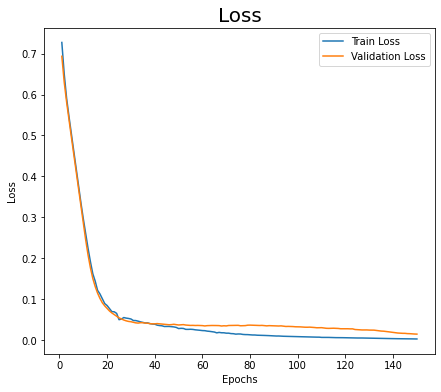

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.title('Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

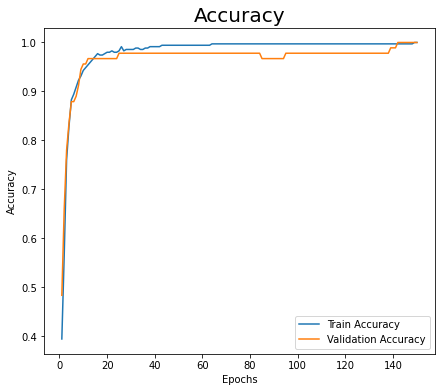

In [103]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 최종평가

In [104]:
loss, acc = model.evaluate(test_dataset)

3/3 [==============================] - 0s 5ms/step - loss: 0.1948 - accuracy: 0.9561


In [105]:
print(loss, acc)

0.1947760283946991 0.9561403393745422


#### 새로운 데이터 추론

In [106]:
new_data = X_test[:5]
new_data_scaled = scaler.transform(new_data)

In [107]:
pred = model.predict(new_data_scaled)

In [111]:
pred, pred.shape

(array([[7.2469488e-09],
        [3.2674623e-37],
        [2.5802235e-11],
        [9.9995828e-01],
        [1.1272362e-10]], dtype=float32), (5, 1))

In [109]:
result = (pred > 0.5).astype(np.int8)
result

array([[0],
       [0],
       [0],
       [1],
       [0]], dtype=int8)

In [110]:
result_label = np.where(pred>=0.5, "양성", "악성")
result_label

array([['악성'],
       ['악성'],
       ['악성'],
       ['양성'],
       ['악성']], dtype='<U2')

# Tensorflow 2.3이하 버전에서 Train dataset 구성 및 학습 
- 위의 코드들은 2.4 이후 버전
- 2.3 이하버전에서는 
    1. train_dataset 구성시 **repeat()**를 추가
    2. 학습시에 train/validation 1 epoch당 step 횟수를 추가
        - steps_per_epoch: train set 에 대한 step 횟수
        - validation_steps: validation set 에 대한 step 횟수

In [ ]:
train_dataset2 = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()

val_dataset2 = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCHS)
test_dataset2 = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCHS)

In [ ]:
steps_per_epoch = len(train_dataset)
validation_steps = len(val_dataset)
print(steps_per_epoch, validation_steps)

In [ ]:
model = create_wisconsin_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_dataset2, 
          steps_per_epoch=steps_per_epoch, # train set: 1epoch당 step수
          validation_data=val_dataset2, 
          validation_steps=validation_steps, # val set: 1epoch당 step수
          epochs=10)